In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import haversine as hs
import geopandas as gp
from shapely.geometry import MultiPoint, Point, Polygon
import numpy as np
from sklearn.cluster import DBSCAN
from shapely import wkt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from watertap3.truck_pipe_cost_functions import elevation,pipe_costing

from watertap3.truck_pipe_cost_functions import elevation
from IPython.display import clear_output

from wells_dijkstra_algorithm import *
import pprint

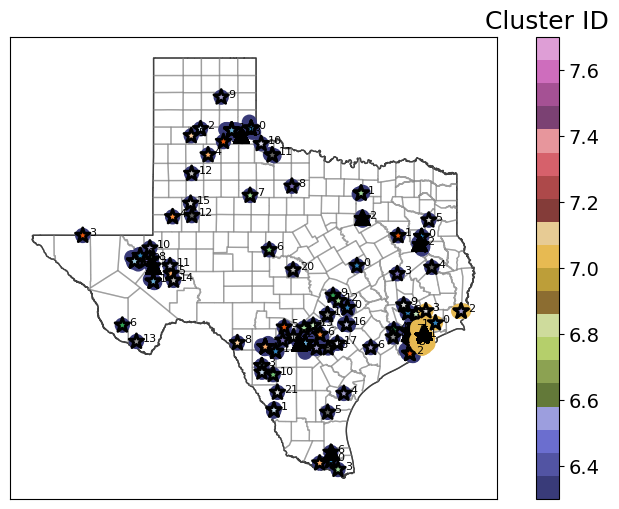

In [26]:
# Read state cluster and subcluster file
df = pd.read_csv(r'\Users\mhardika\Documents\AMO\tx_kmeans_20Nov23.csv',index_col=0)
state_df = df[df['state_alpha']=='TX'] #55
# state_df = df[df['state_alpha']=='CT'] #48

us_counties = gp.read_file(r'\Users\mhardika\Documents\AMO\GeoToolAll_Methods\GeoData\US_County_Boundaries\US_CountyBndrys.shp')
us_counties = us_counties.to_crs("EPSG:4326")
us_states = gp.read_file(r'C:\Users\mhardika\Documents\AMO\2050\analysis_files\tl_rd22_us_state\tl_rd22_us_state.shp')

state_code_df =  pd.read_csv(r'/Users/mhardika/Documents/watertap3/WaterTAP3/watertap3/watertap3/data/state_geocode.csv',index_col='abbv')
abbv_code = state_df.state_alpha.map(state_code_df.state_id)
# state_code_df

state_code = f'{abbv_code[0]:02d}'
state_geo = us_counties.loc[us_counties['STATEFP']==state_code]
state_border = us_states.loc[us_states['STATEFP']==state_code]

centers_long = []
centers_lat = []

for idx , row in state_df.iterrows():
    centers_long.append(row['centroid_long'])
    centers_lat.append(row['centroid_lat'])

fig, ax = plt.subplots( figsize = (10,6))
ax.axes.set_facecolor(color='white')

cm = plt.cm.get_cmap('tab20b')

state_border.plot(ax=ax,facecolor ='none',edgecolor ='black')
state_geo.plot(ax=ax,facecolor ='none',edgecolor ='gray',alpha = 0.5)

# sc = ax.scatter(x = state_df['Longitude'], y = state_df['Latitude'], c= state_df['cluster_id'].values, s=80, cmap=cm, edgecolor ='black')

# ax.scatter(centers_long, centers_lat, c='darkblue', s=120, marker = '^',edgecolor ='black')

# ax.scatter(x = state_df['Longitude'], y = state_df['Latitude'], c = 'lightblue', s=80, cmap=cm, alpha = 0.8)



for cluster in df['cluster_id'].unique():
    df_0 = state_df[(state_df['cluster_id']==cluster)]

    sc = ax.scatter(x = df_0['Longitude'], y = df_0['Latitude'], s=100, 
                c=df_0['cluster_id'].values,cmap=cm)
    
    for i, txt in enumerate(df_0['sub_cluster_id'].unique()):
        ax.annotate(txt, 
                    (df_0[df_0['sub_cluster_id']==i]['sub_cluster_long'].values[0]+0.2, 
                    df_0[df_0['sub_cluster_id']==i]['sub_cluster_lat'].values[0]),fontsize =8)
        # print(i,txt)
    ax.scatter(df_0['sub_cluster_long'].values, df_0['sub_cluster_lat'].values, 
            c=df_0['sub_cluster_id'].values,marker='*',s=120,cmap='tab20c',linewidths=2,edgecolor ='black')
    
    ax.scatter(df_0['centroid_long'], df_0['centroid_lat'], c='black', s=120, marker = '^',edgecolor ='black')

# cbaxes = fig.add_axes([0.1, 0.1, 0.03, 0.8]) 
cbar = plt.colorbar(sc,ax=ax,ticks = plt.MaxNLocator(len(state_df['cluster_id'].unique())))
cbar.ax.set_title('Cluster ID',fontsize = 18)
cbar.ax.tick_params(labelsize=14)

plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

In [3]:
# def find_centroid(coords,cluster_range = 5):
#     kms_per_radian = 6371.0088
#     range_km = cluster_range*1.609343502101154
#     epsilon = range_km/ kms_per_radian

#     db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
#     cluster_labels = db.labels_

#     # get the number of clusters
#     num_clusters = len(set(cluster_labels))

#     # turn the clusters in to a pandas series, where each element is a cluster of points
#     clusters = pd.Series((coords[cluster_labels==n] for n in range(num_clusters)))
#     centroids = []

#     for ea in clusters:
#         centroids.append((MultiPoint(ea).centroid.x, MultiPoint(ea).centroid.y))

#     centroids = np.array(centroids)
#     return [centroids,cluster_labels]

In [4]:
# # Iterate through clusters in WI and create group
# sub_cluster_df = pd.DataFrame(columns = ['sub_cluster_id','centroid'])

# for cluster_id in state_df['cluster_id'].unique():
    
#     coords_input = state_df[state_df['cluster_id']==cluster_id][['Latitude', 'Longitude']].to_numpy()
#     centroids,cluster_labels = find_centroid(coords_input,25)

#     loc = [Point(xy) for xy in zip(centroids[:,1],centroids[:,0])]
#     loc = gp.GeoDataFrame(geometry = loc, crs='EPSG:4326')
#     loc.geometry = loc.geometry.to_crs('EPSG:4326')

#     # Assign cluster label
#     temp = pd.DataFrame(columns = ['sub_cluster_id','centroid'])
#     # temp['cluster_id'] = 0
#     temp['sub_cluster_id'] = cluster_labels
#     temp['centroid'] = loc.geometry[cluster_labels].values

#     sub_cluster_df= pd.concat([sub_cluster_df,temp])
#     # sub_cluster_df.reset_index()


# sub_cluster_df
# sub_cluster_df['centroid'].values.x

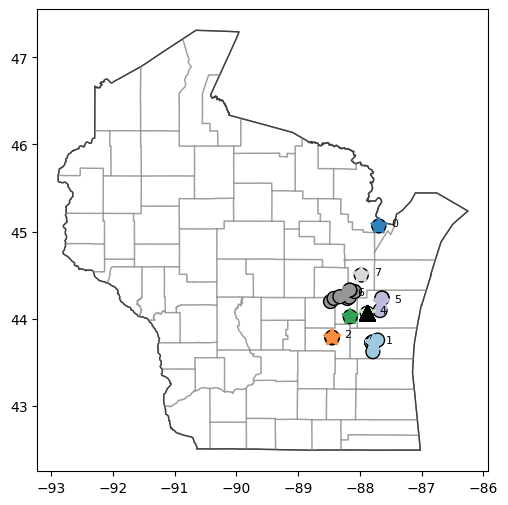

In [8]:
fig, ax = plt.subplots( figsize = (10,6))
ax.axes.set_facecolor(color='white')
cm = plt.cm.get_cmap('tab20c')
state_border.plot(ax=ax,facecolor ='none',edgecolor ='black')
state_geo.plot(ax=ax,facecolor ='none',edgecolor ='gray',alpha = 0.5)

wi_df_0 = state_df[(state_df['cluster_id']==0)]
sc = ax.scatter(x = wi_df_0['Longitude'], y = wi_df_0['Latitude'], s=100, 
                c=wi_df_0['sub_cluster_id'].values,cmap=cm,edgecolor ='black')

for i, txt in enumerate(wi_df_0['sub_cluster_id'].unique()):
    ax.annotate(txt, 
                (wi_df_0[wi_df_0['sub_cluster_id']==i]['sub_cluster_long'].values[0]+0.2, 
                 wi_df_0[wi_df_0['sub_cluster_id']==i]['sub_cluster_lat'].values[0]),fontsize =8)
    # print(i,txt)

ax.scatter(wi_df_0['sub_cluster_long'].values,  wi_df_0['sub_cluster_lat'].values, 
           c=wi_df_0['sub_cluster_id'].values,marker='*',s=120,cmap='tab20c',linewidths=2)
ax.scatter(wi_df_0['centroid_long'], wi_df_0['centroid_lat'], c='black', s=120, marker = '^',edgecolor ='black')

In [6]:
# state_df['sub_cluster_id'] = sub_cluster_df['sub_cluster_id']
state_df.head(2)

,state_alpha,unique_site_ID,Latitude,Longitude,county_nm,well_depth_ft,well_yield,TDS_kgm3,elec_price,well_field_lcow,cluster_id,centers,well_elevation,centroid_long,centroid_lat,sub_cluster_id,sub_cluster_long,sub_cluster_lat,sub_cluster_to centroid_dist_km
0,TX,NURE-OR10978,34.718,-100.142,Childress,269.0,0.037854,3.158591,0.0545,0.051043,0,[ 34.31014667 -100.51140111],566.690002,-100.439,34.543,0,-100.147606,34.711933,32.614832
1,TX,NURE-OR11764,34.675,-100.707,Hall,128.0,0.063090,1.829076,0.0545,0.040453,0,[ 34.31014667 -100.51140111],654.029968,-100.439,34.543,1,-100.724571,34.664286,29.411147


In [7]:
def get_data_2(df):

    # nodes are the well unique ids
    nodes = np.concatenate((['treatment_node'],df['sub_cluster_id'].unique()),axis=0)
    init_graph = {}
    # Tried directly using the treatment centroid but that doesn't use the other nodes
    treatment_node_loc = (df['centroid_lat'].values[0],df['centroid_long'].values[0])

    # sub_centroid_loc = (df['sub_cluster_lat'].values[0],df['sub_cluster_long'].values[0])

    for node in nodes[1::]:
        # print(node)
        node0 = df[df['sub_cluster_id']==int(node)]
        node0_long = node0['Longitude'].values[0]
        node0_lat =  node0['Latitude'].values[0]
        node0_loc = (node0_lat,node0_long)
        
        init_graph[str(node)] = {}

        # Only include nodes very close to the centroid

        dist = hs.haversine(node0_loc,treatment_node_loc)
        # if dist<50:
        init_graph[str(node)]['treatment_node'] = dist
        
        # dist = hs.haversine(node0_loc,sub_centroid_loc)       
        # init_graph[str(node)]['sub_cluster_node'] = dist
        
    for other_node in nodes[1::]:
        node_other = df[df['sub_cluster_id']== int(other_node)]
        node_other_long = node_other['Longitude'].values[0]
        node_other_lat =  node_other['Latitude'].values[0]
        node_other_loc = (node_other_lat,node_other_long)
        dist = hs.haversine(node0_loc,node_other_loc)
        if dist<250:
            init_graph[str(node)][other_node] = dist

    return nodes,init_graph

In [8]:
def get_data_1(df):

    # nodes are the well unique ids
    nodes = np.concatenate((['treatment_node','sub_cluster_node'],df['unique_site_ID'].values),axis=0)
    # print(nodes)
    init_graph = {}

    # Tried directly using the treatment centroid but that doesn't use the other nodes
    treatment_node_loc = (df['centroid_lat'].values[0],df['centroid_long'].values[0])

    sub_centroid_loc = (df['sub_cluster_lat'].values[0],df['sub_cluster_long'].values[0])

    for well in nodes[2::]:
        node0 = df[df['unique_site_ID']==well]
        node0_long = node0['Longitude'].values[0]
        node0_lat =  node0['Latitude'].values[0]
        node0_loc = (node0_lat,node0_long)
        
        init_graph[well] = {}

        # Only include nodes very close to the centroid
        dist = hs.haversine(node0_loc,treatment_node_loc)
        dist = hs.haversine(node0_loc,sub_centroid_loc)
        print(dist)

        init_graph[well]['treatment_node'] = dist
        init_graph[well]['sub_cluster_node'] = dist

        # if dist < 17:
        #     init_graph[well]['treatment_node'] = dist
        # else:
        #     init_graph[well]['treatment_node'] = 1e9
        
        for other_well in nodes[2::]:
            node_other = df[df['unique_site_ID']==other_well]
            node_other_long = node_other['Longitude'].values[0]
            node_other_lat =  node_other['Latitude'].values[0]
            node_other_loc = (node_other_lat,node_other_long)
            dist = hs.haversine(node0_loc,node_other_loc)

            init_graph[well][other_well] = dist

    return nodes,init_graph

In [6]:
def get_data(df):

    # nodes are the well unique ids
    nodes = np.concatenate((['treatment_node'],df['sub_cluster_id'].unique()),axis=0)
    init_graph = {}
    # Use the treatment centroid
    treatment_node_loc = (df['centroid_lat'].values[0],df['centroid_long'].values[0])

    # Create a dictionary for distances
    for node in nodes[1::]:
        init_graph[node] = {}

    # Iterate through each node
    for i in range(1,len(nodes[1::])): 
        node0 = df[df['sub_cluster_id']==int(nodes[i])]
        node0_long = node0['Longitude'].values[0]
        node0_lat =  node0['Latitude'].values[0]
        node0_loc = (node0_lat,node0_long)

        min_sub_node = ''
        min_dist = 1e9
        
        for sub_node in nodes[i::]:
            # Skip itself in the interval iteration
            if sub_node == nodes[i]:
                continue
            else:
                node_other = df[df['sub_cluster_id']== int(sub_node)]
                node_other_long = node_other['Longitude'].values[0]
                node_other_lat =  node_other['Latitude'].values[0]
                node_other_loc = (node_other_lat,node_other_long)
                dist = hs.haversine(node0_loc,node_other_loc)
                
                # Find the node closest to the outer loop node
                if dist<min_dist:
                    min_dist=dist
                    min_sub_node=sub_node           
        init_graph[nodes[i]][min_sub_node] = min_dist

    # Check if each node is connected and connect only nodes less than 160 km to cluster centroid
    for node in nodes[1::]:
        node_other = df[df['sub_cluster_id']== int(node)]
        node_other_long = node_other['Longitude'].values[0]
        node_other_lat =  node_other['Latitude'].values[0]
        node_other_loc = (node_other_lat,node_other_long)

        dist = hs.haversine(node_other_loc,treatment_node_loc)
        if dist == 0:
            init_graph[node]['treatment_node'] = dist + 1e-10

        elif len(init_graph[node])==0 and dist< 160:
            init_graph[node]['treatment_node'] = dist

    return nodes,init_graph

In [7]:
# Going through 1 subcluster
cluster_df = state_df[(state_df['cluster_id']== 0)]
cluster_df_sort = cluster_df.sort_values(['state_alpha','cluster_id','sub_cluster_to centroid_dist_km'],
                                                         ascending=[True,True,False]).groupby(['state_alpha','cluster_id']).apply(pd.DataFrame)

nodes,init_graph = get_data(cluster_df_sort)

graph = Graph(nodes, init_graph)

path_array = []
for node in nodes[1::]:
    previous_nodes, shortest_path = dijkstra_algorithm(graph=graph, start_node= node)
    path = print_result(previous_nodes, shortest_path, start_node=node, target_node="treatment_node")
    path_array.append(path)
    # print(path)

path_array = path_array[::-1]

0 -> 7 -> 4 -> treatment_node
2 -> 3 -> 4 -> treatment_node
7 -> 4 -> treatment_node
1 -> 4 -> treatment_node
6 -> 3 -> 4 -> treatment_node
5 -> 4 -> treatment_node
3 -> 4 -> treatment_node
4 -> treatment_node


In [153]:
# Assign the total volume of water produced by each sub-cluster
sub_cluster_well_vol={}
for node in nodes[1::]:
    sub_cluster_well_vol[node] = cluster_df_sort[cluster_df_sort['sub_cluster_id']==int(node)]['well_yield'].sum()

sub_cluster_well_vol

{'0': 0.0151416479999999,
 '2': 0.1332465023999998,
 '7': 0.0265609741999999,
 '1': 0.1112911127999995,
 '6': 0.23185648499999967,
 '5': 0.0641627333999999,
 '3': 0.013248942,
 '4': 0.033122355}

In [75]:
# pprint.pprint(init_graph)

{'0': {'7': 66.43726039693972},
 '1': {'4': 38.42054323566144},
 '2': {'3': 35.51519814615723},
 '3': {'2': 35.51519814615723,
       '4': 22.531939816386043,
       '6': 31.933142440593738},
 '4': {'1': 38.42054323566144,
       '3': 22.531939816386043,
       '5': 16.886074022039246,
       '7': 49.289937815099485,
       'treatment_node': 1e-10},
 '5': {'4': 16.886074022039246},
 '6': {'3': 31.933142440593738},
 '7': {'0': 66.43726039693972, '4': 49.289937815099485}}


In [197]:
# Distance at each node is fixed
# Iterate to calculate volume
visited_node = []
pipe_dist = {}
pipe_vol = {}

# Calculate pipe length in each section
for i in range(0,len(path_array)):
    for j in range(0,len(path_array[i])-1):
        if path_array[i][j] in visited_node:
            continue
        else:
            dist = init_graph[path_array[i][j]][path_array[i][j+1]]
            visited_node.append(path_array[i][j])
            pipe_dist[path_array[i][j]] = dist


# Calculate pipe volume going forward from each node
# path_array_rev = path_array[::-1]
# visited_node = []

# for i in range(0,len(path_array)):
#     print(path_array[i])
#     for j in range(0,len(path_array[i])-1):
#         # If it is the first no
#         if j == 0 :
#             if path_array[i][j] in visited_node:
#                 continue
#             else:
#                 pipe_vol[path_array[i][j]] = sub_cluster_well_vol[path_array[i][j]]
#                 visited_node.append(path_array[i][j])
#         else:
#             pipe_vol[path_array[i][j]] = pipe_vol[path_array[i][j]] + pipe_vol[path_array[i][j-1]]
#             # visited_node.append(path_array[i][j])
    
pipe_dist
# pipe_vol
# path_array

{'4': 1e-10,
 '3': 22.531939816386043,
 '5': 16.886074022039246,
 '6': 31.933142440593738,
 '1': 38.42054323566144,
 '7': 49.289937815099485,
 '2': 35.51519814615723,
 '0': 66.43726039693972}

In [196]:
# To calculate volume at each we first need to create a tree of nodes
levels = {}

for i in range(0,len(path_array)):
    # print()
    level = 0
    path_array_1 = path_array[i][:-1]
    for j in range(1,len(path_array_1)+1):
        flag = 0
        # print('level',level)
        # print(path_array_1[-j])
        
        # If it is the first row
        if i == 0:
            levels[level] = [path_array_1[-j]]
        else:
            for check_level in levels.keys():
                # print(check_level)
                if path_array_1[-j] in levels[check_level]:
                    flag = 1
            if flag==1:
                # print(path_array_1[-j],'Already added')
                level = level + 1
                continue
            else:
                try:                     
                    levels[level].append(path_array_1[-j])   
                except KeyError:
                    levels[level] = [path_array_1[-j]]
                level = level + 1

levels

{0: ['4'], 1: ['3', '5', '1', '7'], 2: ['6', '2', '0']}

In [164]:
# Function to build node list for each node

for i in range(0,len(path_array)):
    path_array_1 = path_array[i][:-1]
    for j in range(0,len(path_array_1)):
        nodes_list[path_array_1[j]] = [path_array_1[j]]

for i in range(0,len(path_array)):
    path_array_1 = path_array[i][:-1]
    for j in range(1,len(path_array_1)):
        if path_array_1[j-1] in nodes_list[path_array_1[j]]:
            continue
        else:
            nodes_list[path_array_1[j]].append(path_array_1[j-1])
    

In [190]:
# Function to iterate through levels and calculate pipe vol at each node
pipe_vol = {}
# Initialize the pipe volume
for node in nodes[1::]:
    pipe_vol[node]=0

level_keys = list(levels.keys())
# Iterate through the levels
for i in level_keys[::-1]:
    print()
    # Iterate through list of nodes at that level
    for j in range(0,len(levels[i])):
        print('Node:',levels[i][j])
        # Iterate through the nodes list and calculate the pipe volume
        for k in nodes_list[levels[i][j]]:
            print('Nodes included',k)
            if pipe_vol[levels[i][j]] == 0:
                pipe_vol[levels[i][j]] = sub_cluster_well_vol[k]
            else:
                pipe_vol[levels[i][j]] = pipe_vol[levels[i][j]] + pipe_vol[str(k)]
    



Node: 6
Nodes included 6
Node: 2
Nodes included 2
Node: 0
Nodes included 0

Node: 3
Nodes included 3
Nodes included 6
Nodes included 2
Node: 5
Nodes included 5
Node: 1
Nodes included 1
Node: 7
Nodes included 7
Nodes included 0

Node: 4
Nodes included 4
Nodes included 3
Nodes included 5
Nodes included 1
Nodes included 7


In [192]:
0.0417026221999998+0.37835192939999945+ 0.0641627333999999+0.1112911127999995+ 0.033122355

0.6286307527999987

In [191]:
pipe_vol

{'0': 0.0151416479999999,
 '2': 0.1332465023999998,
 '7': 0.0417026221999998,
 '1': 0.1112911127999995,
 '6': 0.23185648499999967,
 '5': 0.0641627333999999,
 '3': 0.37835192939999945,
 '4': 0.6286307527999986}

In [166]:
levels

{0: ['4'], 1: ['3', '5', '1', '7'], 2: ['6', '2', '0']}

In [165]:
nodes_list

{'4': ['4', '3', '5', '1', '7'],
 '3': ['3', '6', '2'],
 '5': ['5'],
 '6': ['6'],
 '1': ['1'],
 '7': ['7', '0'],
 '2': ['2'],
 '0': ['0']}

In [11]:
# Function to calculate the pipe transport cost

cluster_pipe_to_treatment_lcow_dict = {}
cluster_pipe_to_treatment_cost = 0

for node in nodes[1::]:
    sub_cluster_lat = cluster_df[cluster_df['sub_cluster_id']==int(node)]['sub_cluster_lat'].unique()[0]
    sub_cluster_long = cluster_df[cluster_df['sub_cluster_id']==int(node)]['sub_cluster_long'].unique()[0]
    sub_cluster_elev = elevation(sub_cluster_lat,sub_cluster_long)

    centeroid_lat = cluster_df[cluster_df['sub_cluster_id']==int(node)]['centroid_lat'].unique()[0]
    centeroid_long = cluster_df[cluster_df['sub_cluster_id']==int(node)]['centroid_long'].unique()[0]
    cluster_elev = elevation(centeroid_lat,centeroid_long)

    elec_price = cluster_df[cluster_df['sub_cluster_id']==0]['elec_price'].unique()[0]

    elev_gain = cluster_elev - sub_cluster_elev + 1e-9  # To avoid the zero elevation gain problem

    cluster_pipe_to_treatment_lcow_dict[node] = pipe_costing(pipe_vol[node]*3600*24, pipe_dist[node], elev_gain = elev_gain,
                                      electricity_rate = elec_price)
    cluster_pipe_to_treatment_cost = cluster_pipe_to_treatment_cost + cluster_pipe_to_treatment_lcow_dict[node] * pipe_vol[node]

cluster_pipe_to_treatment_lcow = cluster_pipe_to_treatment_cost/sum(pipe_vol.values())

print(cluster_pipe_to_treatment_lcow)
print(cluster_pipe_to_treatment_lcow_dict)

0.0949213429950129
{'0': 0.0949213429950129}
